In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
df = sns.load_dataset('titanic')
df.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)
df1 = df.copy()
df1.drop(['survived', 'deck'], axis=1, inplace=True) #요금 계산하는데 쓸데 없을 것 같아서 삭제함. deck는 embarked에 있음

In [134]:
df1.isna().sum()

pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [135]:
df1.embarked.fillna('S', inplace=True)
df1.age.fillna(round(df1.age.mean()), inplace=True)

In [136]:
from sklearn.preprocessing import LabelEncoder
df1_sex_encoder = LabelEncoder()
df1_sex_encoder.fit(df1['sex'])
df1['sex'] = df1_sex_encoder.transform(df1['sex'])
df1_embarked_encode = LabelEncoder()
df1_embarked_encode.fit(df1['embarked'])
df1['embarked'] = df1_embarked_encode.transform(df1['embarked'])
print(df1_sex_encoder.classes_)
print(df1_embarked_encode.classes_)

['female' 'male']
['C' 'Q' 'S']


In [137]:
y = df1.fare
X = df1.drop('fare', axis=1)
X

,pclass,sex,age,sibsp,parch,embarked
0,3,1,22.0,1,0,2
1,1,0,38.0,1,0,0
2,3,0,26.0,0,0,2
3,1,0,35.0,1,0,2
4,3,1,35.0,0,0,2
...,...,...,...,...,...,...
886,2,1,27.0,0,0,2
887,1,0,19.0,0,0,2
888,3,0,30.0,1,2,2
889,1,1,26.0,0,0,0


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [142]:
dt_rgs = DecisionTreeRegressor(max_depth=3)
dt_rgs.fit(X_train, y_train) 
pred = dt_rgs.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

714.0132433324384

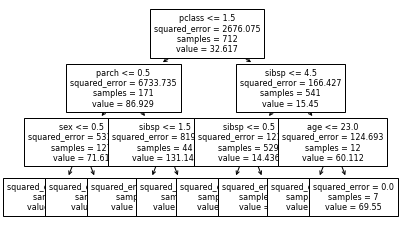

In [144]:
from sklearn.tree import plot_tree
plot_tree(dt_rgs, feature_names=X_train.columns, fontsize=8)
plt.show()

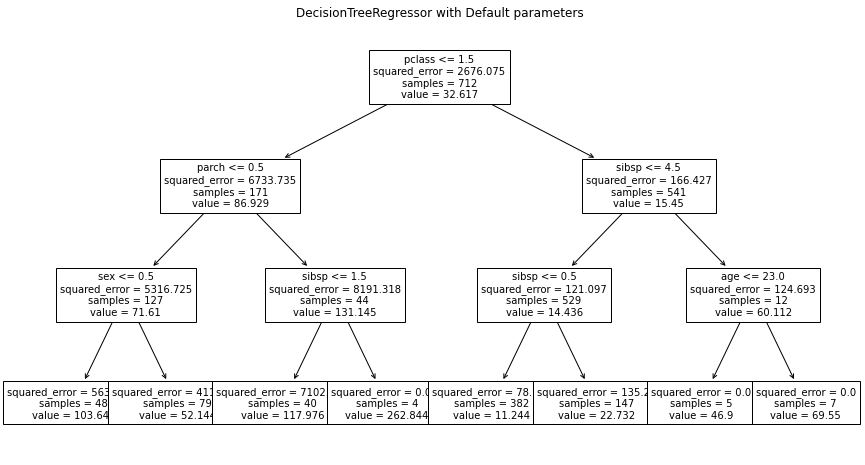

In [145]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)

plot_tree(dt_rgs, feature_names=X_train.columns, fontsize=10, ax=ax1)
ax1.set_title('DecisionTreeRegressor with Default parameters')
plt.show()

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('titanic')
df1 = df.copy()
df1.drop(['class', 'embark_town', 'alive'], axis=1, inplace=True)
df1.deck = df1.deck.astype('O')
df1.deck.fillna('N', inplace=True)
df1.embarked.fillna('S', inplace=True)
df1.age.fillna(df1.age.median(), inplace=True)

In [88]:
le_columns = df1.columns[(df1.dtypes=='O')|(df1.dtypes=='category')|(df1.dtypes=='bool')]

In [90]:
for i in le_columns:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])

In [91]:
X = df1.drop('fare', axis=1)
y = df1.fare

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
dtreg = DecisionTreeRegressor(max_depth=3) # "mse", "friedman_mse", "mae"
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

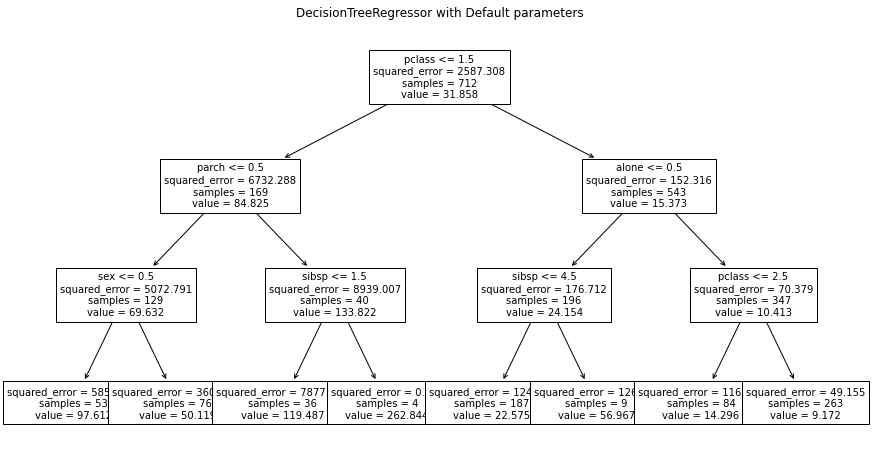

In [93]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)

plot_tree(dtreg, feature_names=X_train.columns, fontsize=10, ax=ax1)
ax1.set_title('DecisionTreeRegressor with Default parameters')
plt.show()

In [95]:
from sklearn.metrics import mean_squared_error
fare_pred = dtreg.predict(X_test)
mean_squared_error(y_test, fare_pred)

760.3996006430482

In [96]:
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
get_ipython().run_line_magic('matplotlib', 'inline')
warnings.filterwarnings('ignore')

In [98]:
print("Feature importanes:\n{0}".format(np.round(dtreg.feature_importances_, 3)))

Feature importanes:
[0.    0.672 0.076 0.    0.091 0.136 0.    0.    0.    0.    0.026]


In [99]:
f_i1 = {}
f_i2 = {}

In [100]:
for name, value in zip(X_train.columns, dtreg.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    f_i1[name] = value

survived : 0.000
pclass : 0.672
sex : 0.076
age : 0.000
sibsp : 0.091
parch : 0.136
embarked : 0.000
who : 0.000
adult_male : 0.000
deck : 0.000
alone : 0.026


In [101]:
result1 = sorted(f_i1.items(), key=lambda x:x[1], reverse=True)

In [102]:
for i, j in result1:
    f_i2[i] = j

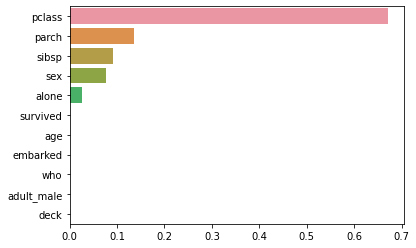

In [103]:
# feature importance를 column 별로 시각화하기
sns.barplot(x=list(f_i2.values()), y=list(f_i2.keys()))
plt.show()

In [104]:
params = {'max_depth':range(2, 10),
         'ccp_alpha':[i*0.01 for i in range(0, 100)]}
gs_dtreg = GridSearchCV(dtreg, param_grid=params, scoring='neg_mean_squared_error', n_jobs=2, cv=5)

In [105]:
gs_dtreg.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=3), n_jobs=2,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                       0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13,
                                       0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2,
                                       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27,
                                       0.28, 0.29, ...],
                         'max_depth': range(2, 10)},
             scoring='neg_mean_squared_error')

In [106]:
print(gs_dtreg.best_params_)
print(gs_dtreg.best_estimator_)
print(gs_dtreg.best_score_)

{'ccp_alpha': 0.0, 'max_depth': 4}
DecisionTreeRegressor(max_depth=4)
-1249.523135256937


In [107]:
mean_squared_error(y_test, gs_dtreg.best_estimator_.predict(X_test))

694.8329163023777